In [13]:
#### IMPORT PACKAGES
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from transformers import pipeline
import seaborn as sns

# add parent directory to the Python path
sys.path.append("..")

In [30]:
#### INITIALIZE HUGGINGFACE PIPELINE
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/coder/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [80]:
##### READ IN DATA
filename = os.path.join("..","in", "fake_or_real_news.csv")
data = pd.read_csv(filename, index_col = 0)
data = data.reset_index(drop = True) # this was added to prevent errors in the for loop
headlines = data["title"]
fake_or_real = data["label"] # label here refers to fake/real

In [97]:
# create empty df to store results
results_df = pd.DataFrame(columns=["real/fake", "emotion", "count", "proportion"])

# Only going through the first 100 headlines to save time while testing
for i, headline in enumerate(headlines[:100]):
    preds = classifier(headline)
    top_emotion = max(preds[0], key=lambda x:x['score'])
    predicted_emotion = top_emotion['label']
    news_label = fake_or_real[i]

    # append predicted emotion and real/fake label to the df
    results_df.loc[len(results_df)] = [news_label, predicted_emotion, 1, None]

# group results by "real/fake" and "emotion" and sum the counts
grouped_results_df = results_df.groupby(["real/fake", "emotion"], as_index=False)["count"].sum()

# calculate the total count for each "real/fake" group
total_count = grouped_results_df.groupby("real/fake", as_index=False)["count"].sum()

# calculate the proportion for each group
results_df["proportion"] = results_df.apply(lambda x: x["count"] / total_count[total_count["real/fake"] == x["real/fake"]]["count"].values[0], axis=1)

# group the results by "real/fake" and "emotion" again and sum the counts and proportions
grouped_results_df = results_df.groupby(["real/fake", "emotion"], as_index=False).agg({"count": "sum", "proportion": "sum"})

# Print the grouped results DataFrame
print(grouped_results_df)

   real/fake   emotion  count  proportion
0       FAKE     anger      5    0.116279
1       FAKE   disgust      3    0.069767
2       FAKE      fear      7    0.162791
3       FAKE       joy      1    0.023256
4       FAKE   neutral     23    0.534884
5       FAKE   sadness      2    0.046512
6       FAKE  surprise      2    0.046512
7       REAL     anger      8    0.140351
8       REAL   disgust      3    0.052632
9       REAL      fear     11    0.192982
10      REAL       joy      1    0.017544
11      REAL   neutral     28    0.491228
12      REAL   sadness      4    0.070175
13      REAL  surprise      2    0.035088


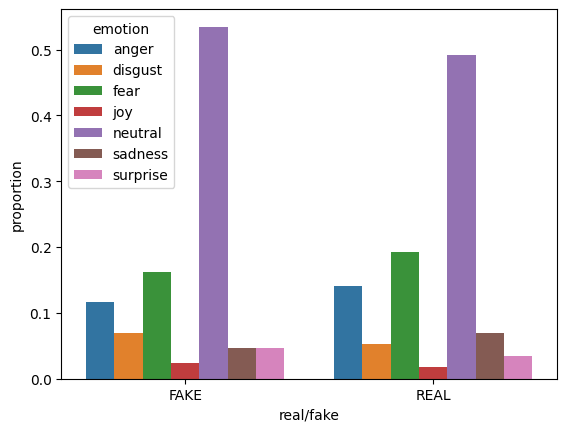

In [100]:
# create a bar chart using seaborn
sns.barplot(data=grouped_results_df, x="real/fake", y="proportion", hue="emotion")

# display the plot
plt.show()